**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Jaime Omar Espinosa Rodriguez
*   MATRÍCULA: A01797356

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
cars_df = pd.read_csv('vehicles.csv', encoding='latin-1')

cars_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [12]:
columns_to_drop = ['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long']
cars_df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [15]:
# comprobar columns dropped
print(cars_df.columns)
print(cars_df.shape)

Index(['region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'county',
       'state'],
      dtype='object')
(426880, 18)


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [17]:
n_rows = cars_df.shape[0]  # número de filas
n_cols = cars_df.shape[1]  # número de columnas

print(f"Número de filas: {n_rows}")
print(f"Número de columnas: {n_cols}")

Número de filas: 426880
Número de columnas: 18


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [18]:
# definir treshold
threshold = int(n_rows * 0.7) # 70% NO NULOS para conservar columna

# eliminar columnas con mayor/igual NaN
cars_df.dropna(thresh=threshold, axis=1, inplace=True)



In [20]:
n_cols_after = cars_df.shape[1]
print(f"Columnas eliminadas: {n_cols - n_cols_after}")

Columnas eliminadas: 6


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [25]:
# % de NaNs por columna < 5%
missing_percent = cars_df.isna().mean()
nans_cols = missing_percent[missing_percent < 0.05].index



In [26]:
# eliminar filas NaN
cars_df.dropna(subset=nans_cols, inplace=True)


In [27]:
n_rows_after = cars_df.shape[0]
eliminados_pct = (n_rows - n_rows_after) / n_rows * 100
print(f"Porcentaje de registros eliminados: {eliminados_pct:.2f}%")


Porcentaje de registros eliminados: 8.73%


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [28]:
# identificar columnas con NaNs
missing_cols = cars_df.columns[cars_df.isna().any()]

# tipos de columnas numericas y categoricas
numeric_cols = cars_df[missing_cols].select_dtypes(include=['number']).columns
categorical_cols = cars_df[missing_cols].select_dtypes(include=['object']).columns



In [29]:
# metodo de imputación usando mediana para datos numericos
for col in numeric_cols:
    cars_df[col].fillna(cars_df[col].median(), inplace=True)


In [32]:
print(cars_df[numeric_cols].isna().sum())


Series([], dtype: float64)


In [35]:
# método de imputación usando moda para datos categóricos
for col in categorical_cols:
    moda = cars_df[col].mode()[0]  # obtener la moda
    cars_df[col] = cars_df[col].fillna(moda)


In [36]:
print(cars_df[categorical_cols].isna().sum())


type    0
dtype: int64


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

<Axes: >

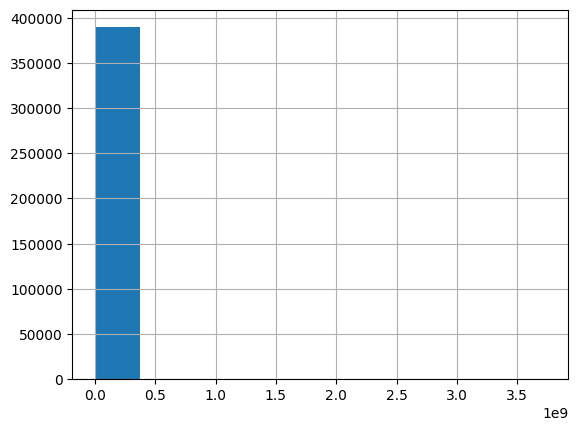

In [39]:
cars_df['price'].hist()


<Axes: >

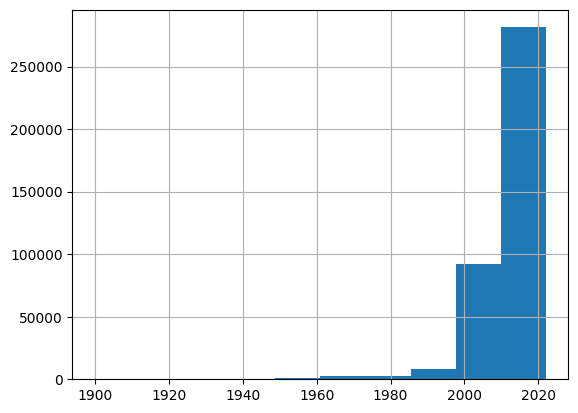

In [40]:
cars_df['year'].hist()


<Axes: >

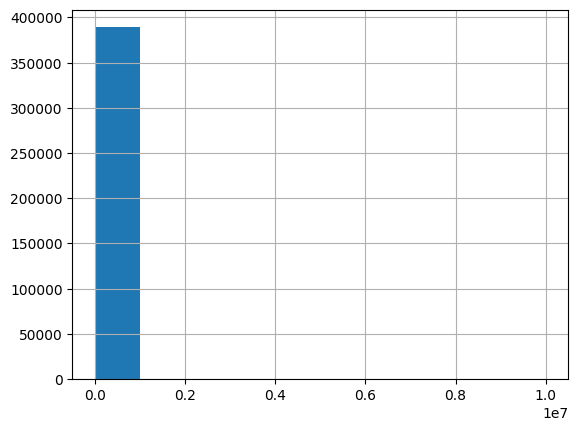

In [41]:
cars_df['odometer'].hist()

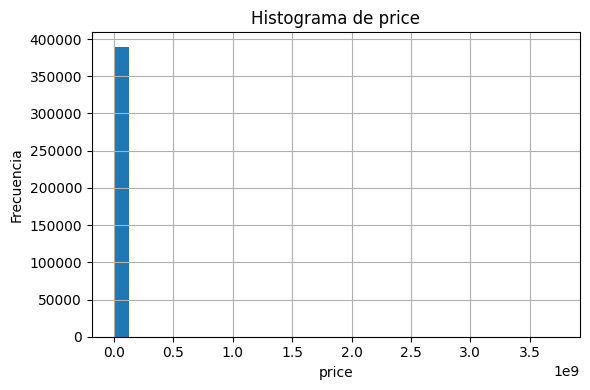

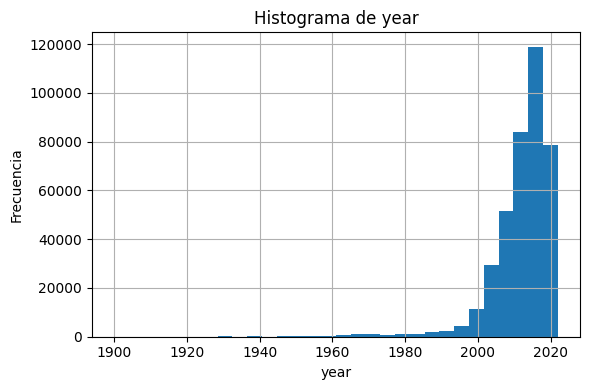

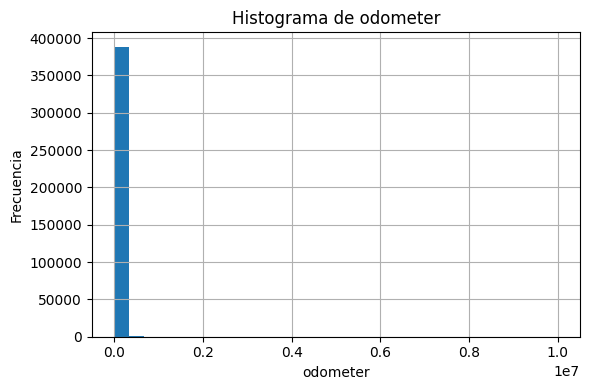

In [42]:
import matplotlib.pyplot as plt

cols_to_plot = ['price', 'year', 'odometer']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    cars_df[col].hist(bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [43]:
cars_df['year'].max()

2022.0

In [44]:
# agregar columna age
cars_df['age'] = 2023 - cars_df['year']

# eliminar columna year
cars_df.drop(columns=['year'], inplace=True)



<Axes: >

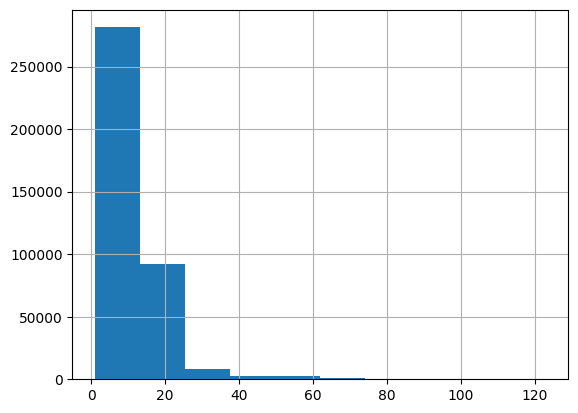

In [48]:
# sin bins
cars_df['age'].hist()

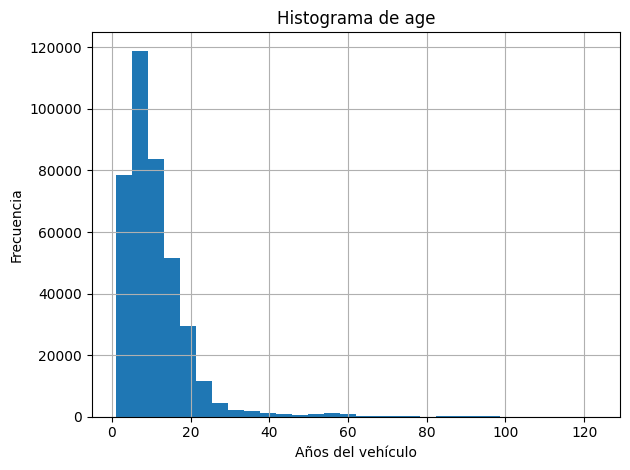

In [46]:
cars_df['age'].hist(bins=30)
plt.title('Histograma de age')
plt.xlabel('Años del vehículo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

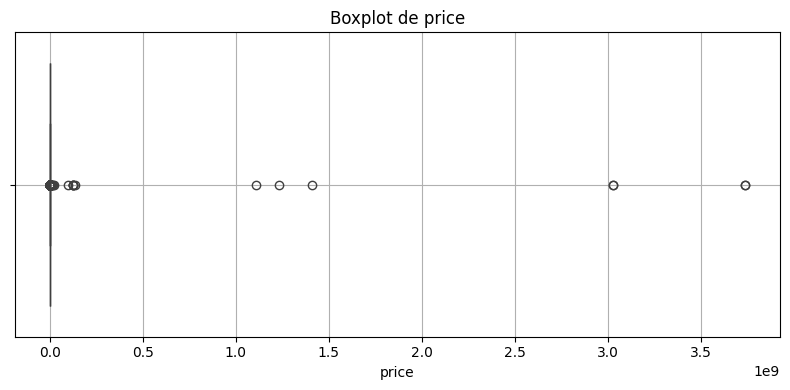

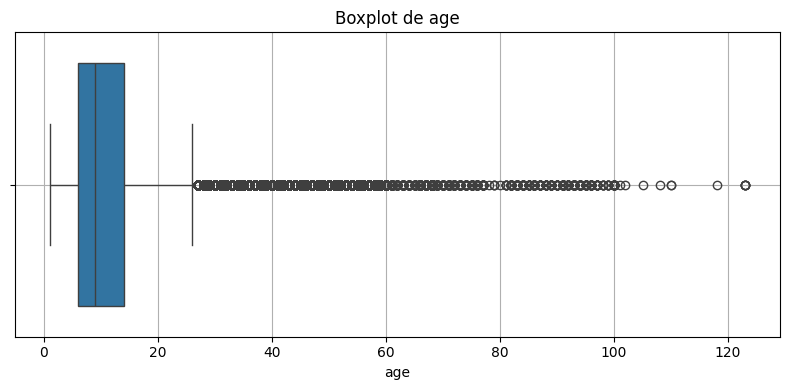

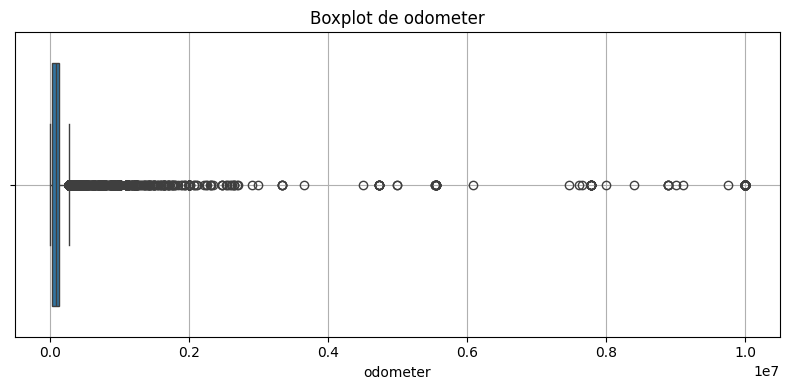

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_plot = ['price', 'age', 'odometer']

for col in cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cars_df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [50]:
outlier_masks = {}

for col in ['price', 'age', 'odometer']:
    Q1 = cars_df[col].quantile(0.25)
    Q3 = cars_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (cars_df[col] < lower) | (cars_df[col] > upper)
    outlier_masks[col] = mask

    print(f"{col}: {mask.sum()} outliers ({mask.sum() / len(cars_df) * 100:.2f}%)")


price: 6656 outliers (1.71%)
age: 14209 outliers (3.65%)
odometer: 3226 outliers (0.83%)


In [51]:
# outliers
combined_mask = (
    outlier_masks['price'] |
    outlier_masks['age'] |
    outlier_masks['odometer']
)

# elimina outliers
cars_df = cars_df[~combined_mask]


In [52]:
#
n_rows_after = len(cars_df)
eliminados_pct = (n_rows - n_rows_after) / n_rows * 100
print(f"Se eliminaron {eliminados_pct:.2f}% de los registros.")

Se eliminaron 14.18% de los registros.


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

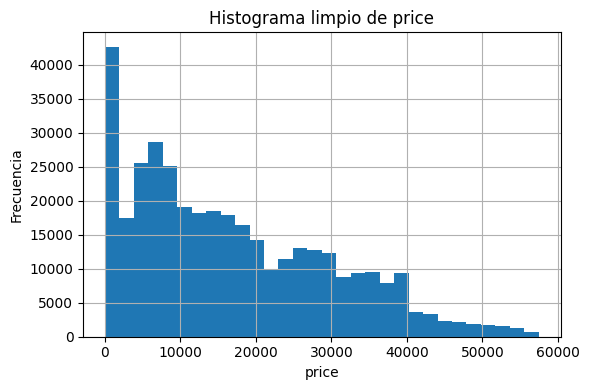

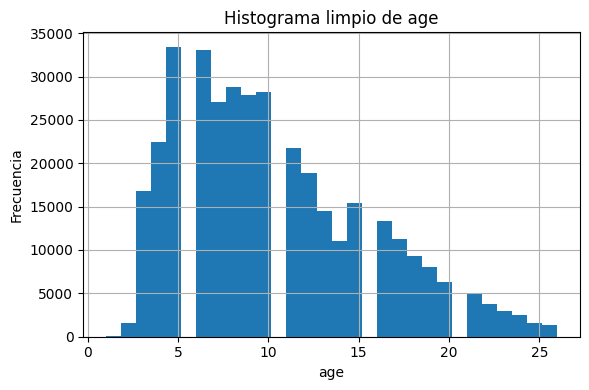

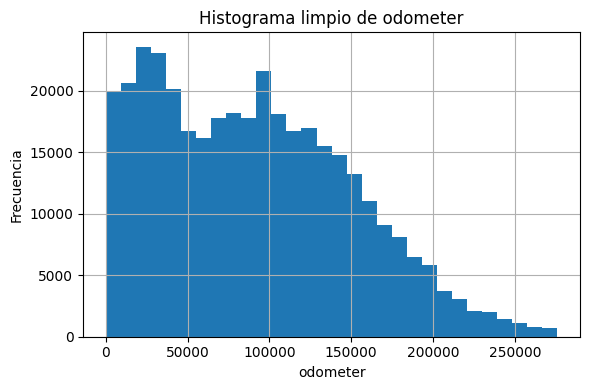

In [53]:
import matplotlib.pyplot as plt

cols_to_plot = ['price', 'age', 'odometer']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    cars_df[col].hist(bins=30)
    plt.title(f'Histograma limpio de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


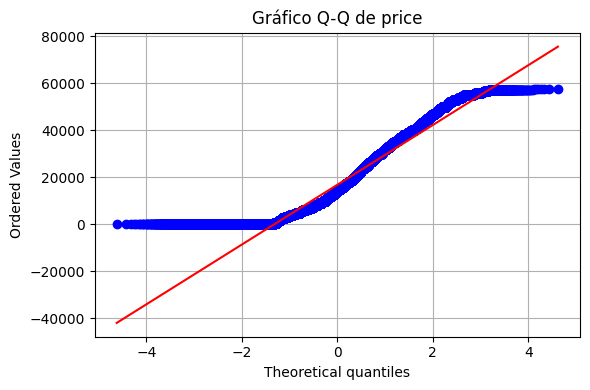

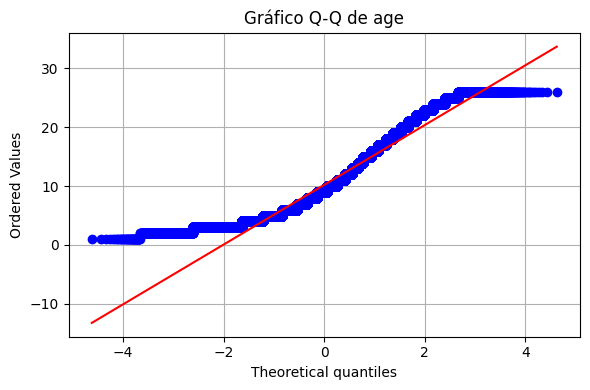

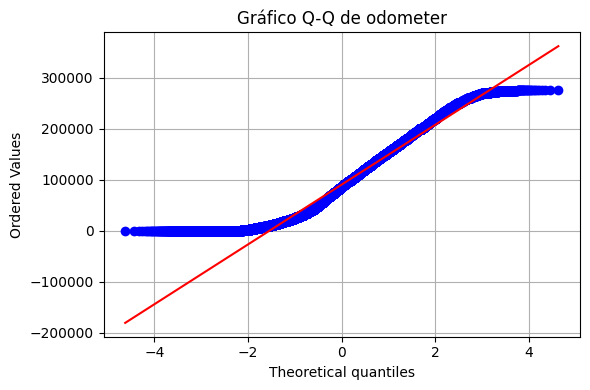

In [54]:
import scipy.stats as stats
import matplotlib.pyplot as plt

cols = ['price', 'age', 'odometer']

for col in cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(cars_df[col], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [55]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Seleccionar variables a transformar
vars_to_transform = ['price', 'odometer']

# Crear transformador Yeo-Johnson
yeojohnson = PowerTransformer(method='yeo-johnson', standardize=False)

# Ajustar y transformar
transformed = yeojohnson.fit_transform(cars_df[vars_to_transform])

# Crear un nuevo DataFrame con las variables transformadas
transf_df = pd.DataFrame(transformed, columns=[f'{col}_yj' for col in vars_to_transform])


In [56]:
transf_df.head()

,price_yj,odometer_yj
0,194.933364,623.675987
1,164.326657,695.994731
2,209.204110,346.526341
3,188.293578,519.996769
4,137.708592,949.705360


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

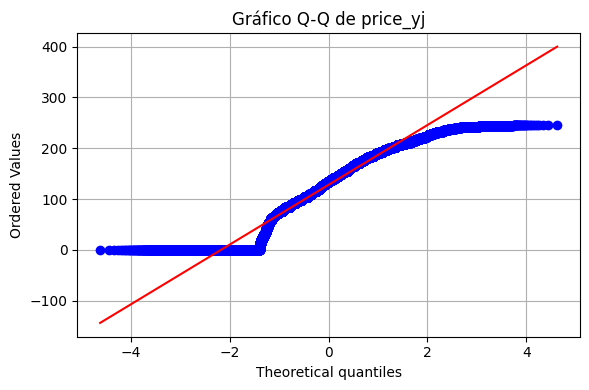

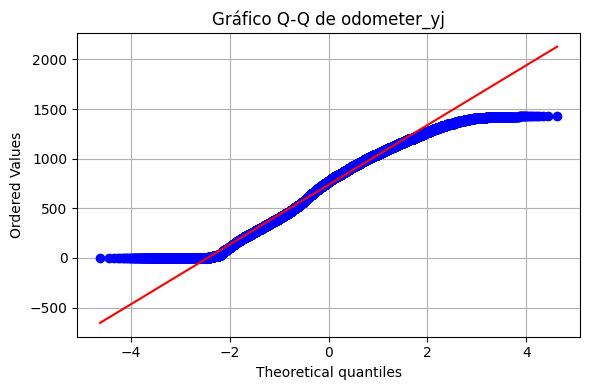

In [58]:
# graficos Q-Q
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in transf_df.columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(transf_df[col], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q de {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


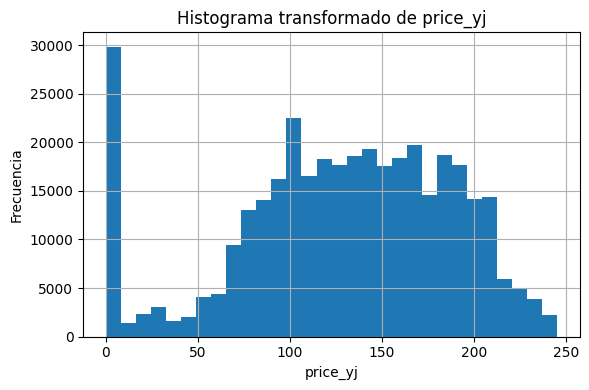

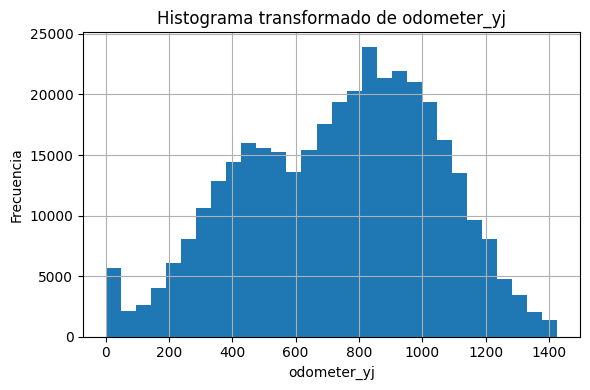

In [57]:
#histogramas
import matplotlib.pyplot as plt

for col in transf_df.columns:
    plt.figure(figsize=(6, 4))
    transf_df[col].hist(bins=30)
    plt.title(f'Histograma transformado de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [59]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Crear el escalador
scaler = MinMaxScaler()

# Ajustar y transformar transf_df
scaled_data = scaler.fit_transform(transf_df)

# Crear un nuevo DataFrame con los datos escalados
minmax_df = pd.DataFrame(scaled_data, columns=transf_df.columns)


In [60]:
minmax_df.describe()


,price_yj,odometer_yj
count,366328.000000,366328.000000
mean,0.522334,0.516832
std,0.244615,0.212560
min,0.000000,0.000000
25%,0.376821,0.354261
50%,0.544388,0.540365
75%,0.711124,0.678975
max,1.000000,1.000000


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

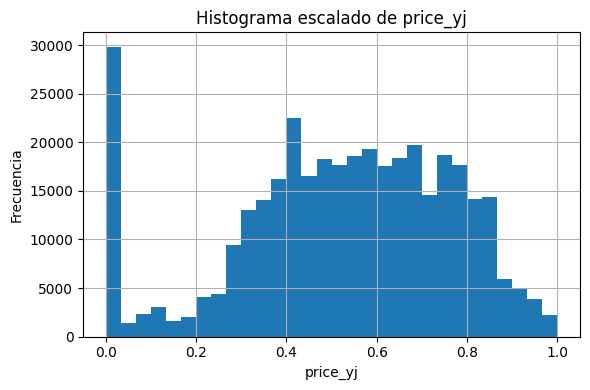

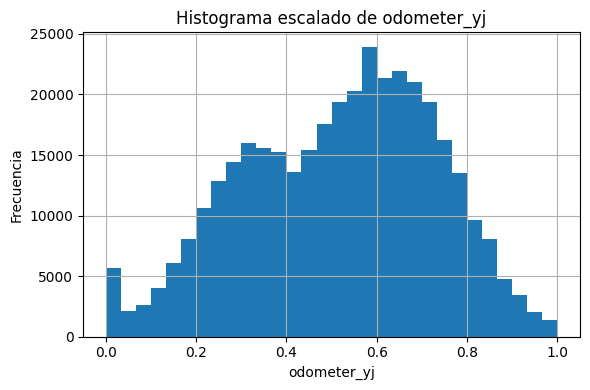

In [61]:
import matplotlib.pyplot as plt

for col in minmax_df.columns:
    plt.figure(figsize=(6, 4))
    minmax_df[col].hist(bins=30)
    plt.title(f'Histograma escalado de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.